# CSGO Oracle
## Lucas Vidigal e Tiago Trotta

### 1. Imports das dependências

In [1]:
from network import Network
import p_calc
import io_op
import matplotlib.pyplot as plt

### 2. Definição da rede

In [2]:
# network_file = "BLAST-Premier-Fall-2020-30"
network_file = "IEM-BEIJING-HAIDIAN-2020-30"

### 3. Carregamento da rede
#### 3.1. Carregamento a partir de arquivo gt ou construção a partir de json

In [3]:
# Carregamento de uma rede já construida, salva em um arquivo no formato gt
net = Network(file_name=network_file + ".gt")

In [3]:
# Construção de uma nova rede a partir de um arquivo json
nodes_info, links_info = io_op.read_json(str(network_file + ".json"))
net = Network(nodes_info=nodes_info, links_info=links_info)

#### 3.2. *Opcional*: Salvamento da rede em um arquivo no formato gt

In [10]:
net.save_network(network_file + ".gt")

True

#### 3.3. *Opcional*: Renderização de uma representação gráfica da rede em pdf

In [10]:
net.draw(network_file + ".pdf")

### 4. Informações da rede

#### 4.1. Informações básicas:

In [4]:
print("Informações básicas sobre a rede \"" + network_file + "\":")
print("\n".join(["\t" + k + ": " + str(v) for k, v in net.get_basic_info().items()]))

Informações básicas sobre a rede "IEM-BEIJING-HAIDIAN-2020-30":
	Número de times: 41
	Número de confrontos: 480
	Densidade: 0.5853658536585366
	Grau médio: 23.414634146341463
	Coeficiente de Clusterização: 0.38592561443034457


#### 4.2. Distribuição de graus:

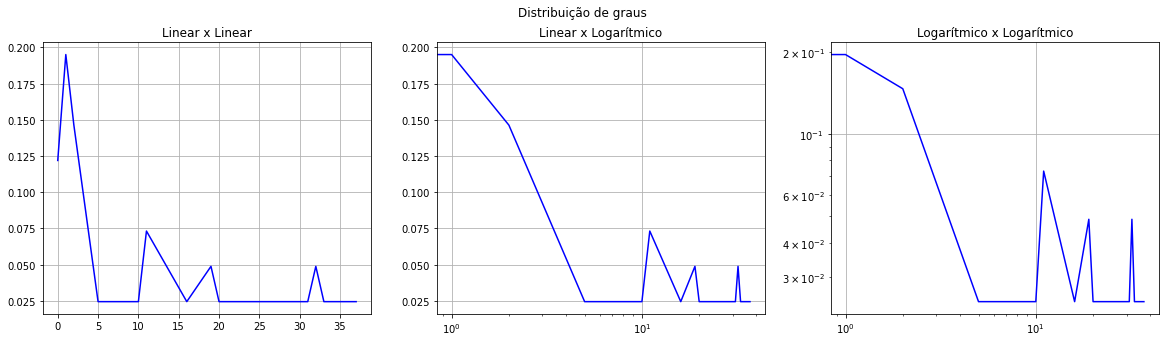

In [17]:
degree_dist = net.degree_distribution()
plot_list = sorted(degree_dist.items()) # Ordenando por chave, returna uma lista de tuplas
x, y = zip(*plot_list) # Transforma a lista de (chave, valor) em duas tuplas

plt.figure(figsize=(20,5))

plt.subplot(131)
plt.title("Linear x Linear")
plt.grid(True)
plt.plot(x, y, "b-")

plt.subplot(132)
plt.xscale("log")
plt.title("Linear x Logarítmico")
plt.grid(True)
plt.plot(x, y, "b-")

plt.subplot(133)
plt.yscale("log")
plt.xscale("log")
plt.title("Logarítmico x Logarítmico")
plt.grid(True)
plt.plot(x, y, "b-")

plt.suptitle("Distribuição de graus")
plt.show()

### 5. Cálculos probabilísticos

#### 5.1. Cálculo dos top-n times com a maior probabilidade de ganhar o campeonato

In [4]:
team_number = 5

In [5]:
# Cálculo do ranking através do Page Rank
print("Times com mais chances de ganhar:")
print("\n".join(["\t" + n + " - PgR: " + str(v["Page Rank"]) +
                ", Prob.: " + str(v["Probabilidade"])
                 for n, v in p_calc.get_top_rank_pgr(net, team_number)]))

Times com mais chances de ganhar:
	Vitality - PgR: 0.08029401830606908, Prob.: 8.029401830606908
	Natus Vincere - PgR: 0.07368911847229094, Prob.: 7.368911847229094
	Heroic - PgR: 0.06649854310122616, Prob.: 6.649854310122616
	OG - PgR: 0.060690757407913035, Prob.: 6.069075740791304
	Astralis - PgR: 0.057404078550091005, Prob.: 5.7404078550091


In [6]:
# Cálculo do ranking através da Centralidade por Grau
print("Times com mais chances de ganhar:")
print("\n".join(["\t" + n + " - PgR: " + str(v["Centralidade Grau"]) +
                ", Prob.: " + str(v["Probabilidade"])
                 for n, v in p_calc.get_top_rank_degree(net, team_number)]))

Times com mais chances de ganhar:
	Vitality - PgR: 0.925, Prob.: 7.7083333333333295
	Heroic - PgR: 0.825, Prob.: 6.874999999999995
	Natus Vincere - PgR: 0.8, Prob.: 6.6666666666666625
	BIG - PgR: 0.8, Prob.: 6.6666666666666625
	Complexity - PgR: 0.775, Prob.: 6.4583333333333295


#### 5.2. Probabilidade de vitória de dois times em um confronto específico

In [7]:
team1 = "MIBR"
team2 = "Complexity"

In [8]:
# Cálculo das probabilidades através do Page Rank
print("\nProbabilidades de vitória em um confronto entre", team1, "e", team2)
print("\n".join(["\t" + n + ": " + "{:.2f}".format(p) + "%"
                for n, p in p_calc.get_prob_match_pgr(team1, team2, net).items()]))


Probabilidades de vitória em um confronto entre MIBR e Complexity
	MIBR: 32.79%
	Complexity: 67.21%


In [9]:
# Cálculo das probabilidades através da Centralidade de Grau
print("\nProbabilidades de vitória em um confronto entre", team1, "e", team2)
print("\n".join(["\t" + n + ": " + "{:.2f}".format(p) + "%"
                for n, p in p_calc.get_prob_match_degree(team1, team2, net).items()]))


Probabilidades de vitória em um confronto entre MIBR e Complexity
	MIBR: 26.19%
	Complexity: 73.81%
